# Tugas Program AI 2, Fuzzy Logic

Nama  : Muhammad Ferianda Satya
Nim   : 1301164400
Kelas : IF 40-07

In [10]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
DataKepalaKeluarga = []
DataPendapatan = []
DataHutang = []
FuzzysetPendapatan = []
FuzzysetHutang = []

In [12]:
#Read Data Tugas 2, masukan ke array Data Kepala Keluarga
f = open('DataTugas2.csv', 'r')
Data = csv.reader(f)
for row in Data:
    DataKepalaKeluarga.append(row)
    DataPendapatan.append(row[1])
    DataHutang.append(row[2])
DataKepalaKeluarga.pop(0) #hapus title
DataPendapatan.pop(0) # Hapus title Pendapatan
DataHutang.pop(0) # Hapus Title hutang
f.close()

# Fuzzification and Rule Evaluation

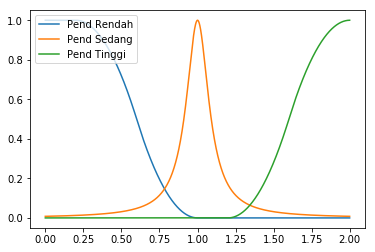

In [13]:
#inisialisasi range sigmoid
a = 0.2
b = 0.6
c = 1.0

b2 = 1.0
c2 = 0.09

a3 = 1.2
b3 = 1.6
c3 = 2.0 

#pendifinisan fungsi sigmoid dan beta
def sigmoidRendah(x):
    if (x <= a):
        return 1
    elif ((a < x) and (x <= b)):
        return 1-2*(((x-a)/(c-a))**2)
    elif ((b < x) and (x < c)):
        return (2*((c-x)/(c-a))**2)
    elif (x >= c):
        return 0
    
def sigmoidSedang(x):
    return 1/(1+abs((x-b2)/c2)**2)

def sigmoidTinggi(x):
    if (x <= a3):
        return 0
    elif ((a3 < x) and (x <= b3)):
        return 2*(((x-a3)/(c3-a3))**2)
    elif ((b3 < x) and (x < c3)):
        return 1-(2*((c3-x)/(c3-a3))**2)
    else:
        return 1 

#visualisasi data fuzzyset untuk Pendapatan
x = np.arange(0, 2.0, 0.001)

y1 = []
y2 = []
y3 = []
for i in np.nditer(x):
    y1.append(sigmoidRendah(i))
    y2.append(sigmoidSedang(i))
    y3.append(sigmoidTinggi(i))

plt.plot(x, y1, label='Pend Rendah')
plt.plot(x, y2, label='Pend Sedang')
plt.plot(x, y3, label='Pend Tinggi')
plt.legend(loc='upper left')

#pengisian fuzzyset Pendapatan indeks 1: Rendah, indeks 2: Sedang, Indeks 3: Tinggi
for i in DataPendapatan:
    temp1 = ["Rendah", (sigmoidRendah(float(i)))]
    temp2 = ["Sedang", (sigmoidSedang(float(i)))]
    temp3 = ["Tinggi", (sigmoidTinggi(float(i)))]
    FuzzysetPendapatan.append([temp1, temp2, temp3])

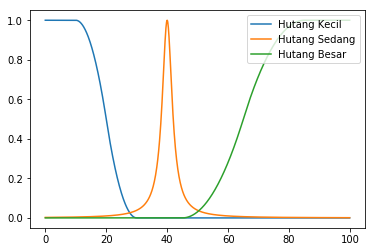

In [14]:
#inisialisasi range sigmoid
a = 10.0
b = 20.0
c = 30.0

b2 = 40.0
c2 = 2.

a3 = 45.0
b3 = 65.0
c3 = 85.0  

#visualisasi data fuzzyset untuk Hutang
x = np.arange(0, 100, 0.1)

#pendifinisan fungsi sigmoid dan beta
def sigmoidRendah(x):
    if (x <= a):
        return 1
    elif ((a < x) and (x <= b)):
        return 1-2*(((x-a)/(c-a))**2)
    elif ((b < x) and (x < c)):
        return (2*((c-x)/(c-a))**2)
    elif (x >= c):
        return 0
    
def sigmoidSedang(x):
    return 1/(1+abs((x-b2)/c2)**2)

def sigmoidTinggi(x):
    if (x <= a3):
        return 0
    elif ((a3 < x) and (x <= b3)):
        return 2*(((x-a3)/(c3-a3))**2)
    elif ((b3 < x) and (x < c3)):
        return 1-(2*((c3-x)/(c3-a3))**2)
    else:
        return 1 

y1 = []
y2 = []
y3 = []
for i in np.nditer(x):
    y1.append(sigmoidRendah(i))
    y2.append(sigmoidSedang(i))
    y3.append(sigmoidTinggi(i))

plt.plot(x, y1, label='Hutang Kecil')
plt.plot(x, y2, label='Hutang Sedang')
plt.plot(x, y3, label='Hutang Besar')
plt.legend(loc='upper right')

#pengisian fuzzyset Hutang indeks 1 : Kecil, indeks 2: Sedang, indeks 3: Besar
for i in DataHutang:
    temp1 = ["Kecil", (sigmoidRendah(float(i)))]
    temp2 = ["Sedang", (sigmoidSedang(float(i)))]
    temp3 = ["Besar", (sigmoidTinggi(float(i)))]
    FuzzysetHutang.append([temp1,temp2,temp3])

# Konjungsi Disjungsi

In [6]:
Fuzzification = []
DFuzzy = [] #Penampungan data hasil Disjungsi
CFuzzy = [] #penampungan data hasil conjungsi
    
#fuzzy rule
def FuzzyRule (a) :
    if ((a[0][0] == "Rendah") and (a[1][0] == "Kecil") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Besar") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Kecil") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Besar") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Kecil") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Besar") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    
    if ((a[0][0] == "Rendah") and (a[1][0] == "Kecil") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Besar") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Kecil") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Besar") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Kecil") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Besar") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]

#disjungsi ditampung pada array
def disjunct(a,b):
    temp = ["Ya", 0]
    temp2 = ["Tidak", 0]
    for i in range(len(a)):
        if ((a[i][0]) == "False"):
            if ((a[i][1]) > temp2[1]):
                temp2 = ["Tidak", a[i][1]]
        elif ((a[i][0] == "True")):
            if ((a[i][1]) > temp[1]):
                temp = ["Ya", a[i][1]]
    return [b+1,temp,temp2]

In [7]:
#permutasi data fuzzy set untuk konjungsi disjungsi, permutasi ada 9 tiap Kepala Keluarga, Total data : 900
temp = []
for i in range(len(DataKepalaKeluarga)):
    for j in range(len(FuzzysetHutang[i])):
        for k in range(len(FuzzysetPendapatan[j])):
            temp = [FuzzysetPendapatan[i][j],FuzzysetHutang[j][k]]
            Fuzzification.append(temp)

#Penampungan data Konjungsi
count = 0
temp = []
for i in range(len(Fuzzification)):    
    if (count < 8):
        count += 1
        temp.append(FuzzyRule(Fuzzification[i]))
    else:
        CFuzzy.append(temp)
        count = 0
        temp = []
        
#Penampungan data Disjungsi (Final Defuzzification)
for i in range(len(CFuzzy)):
    DFuzzy.append(disjunct(CFuzzy[i],i))

# DeFuzzification

In [8]:
#Deklarasi fungsi Sugeno
Tidak = 100
Ya = 1

def Sugeno(a,b):
    return (a*Tidak + b*Ya)/(a+b)

In [9]:
#Defuzzifikasi Hasil Fuzzy disimpan ke DeFuzzification dengan tanda kepala keluarga berupa angka
DeFuzzification = []
for i in range(len(DFuzzy)):
    a = DFuzzy[i][1][1]
    b = DFuzzy[i][2][1]
    DeFuzzification.append([i+1,Sugeno(a,b)])
    
#sort hasil fuzzy untuk memilih 20 hasil terbaik
DeFuzzification = sorted(DeFuzzification, key=lambda kk: kk[1], reverse = True)

#Save data teratas ke file csv, hasil 20 teratas merupakan keluarga yang mendapatkan tunjangan
#Format Data (x,y) x merupakan no urut kepala keluarga, dengan y sebagai nilai kelayakan
with open('DataKeluargaYangMendapatTunjangan.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["NoKepalaKeluarga","NilaiKelayakan"])
    for i in range(20):
        spamwriter.writerow(DeFuzzification[i])